# Pokemón

## Tarea 2:
## Generar tabla de frecuencias de generación de pokemones

In [3]:
#librerías 
library(tidyverse)
library(prob)
library(ggplot2)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: combinat


Attaching package: ‘combinat’


The following object is masked from ‘package:utils’:

    combn


Loading required package: fAsianOptions

Loading required package: timeDate

Loading required package: timeSeries

Loading required package: fBasics

Loading required package: fOptions


Attaching package: ‘prob’


The following objects are masked from ‘package:dplyr’:

    intersect, setdiff, union


The following objects are masked from ‘package:base’:

    intersect, setd

## Archivo

In [4]:
download.file(
  url = "https://raw.githubusercontent.com/jboscomendoza/rpubs/master/pokemon_red/pokemon.csv", 
  destfile = "pokemon.csv")

pokemon <- read_csv(file = "pokemon.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  abilities = col_character(),
  capture_rate = col_character(),
  classfication = col_character(),
  japanese_name = col_character(),
  name = col_character(),
  type1 = col_character(),
  type2 = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [5]:
head(pokemon)

abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,⋯,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,⋯,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,⋯,88.1,2,80,80,60,grass,poison,13.0,1,0
"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,⋯,88.1,3,122,120,80,grass,poison,100.0,1,0
"['Blaze', 'Solar Power']",0.50,1,1,1.0,0.5,1.0,0.5,1,1,⋯,88.1,4,60,50,65,fire,NA,8.5,1,0
"['Blaze', 'Solar Power']",0.50,1,1,1.0,0.5,1.0,0.5,1,1,⋯,88.1,5,80,65,80,fire,NA,19.0,1,0
"['Blaze', 'Solar Power']",0.25,1,1,2.0,0.5,0.5,0.5,1,1,⋯,88.1,6,159,115,100,fire,flying,90.5,1,0


### Tomamos columna de generacion "generation"

In [6]:
gen <- pokemon[['generation']]

In [8]:
#print(gen)

### Se encuentra la siguiente distribución en los datos

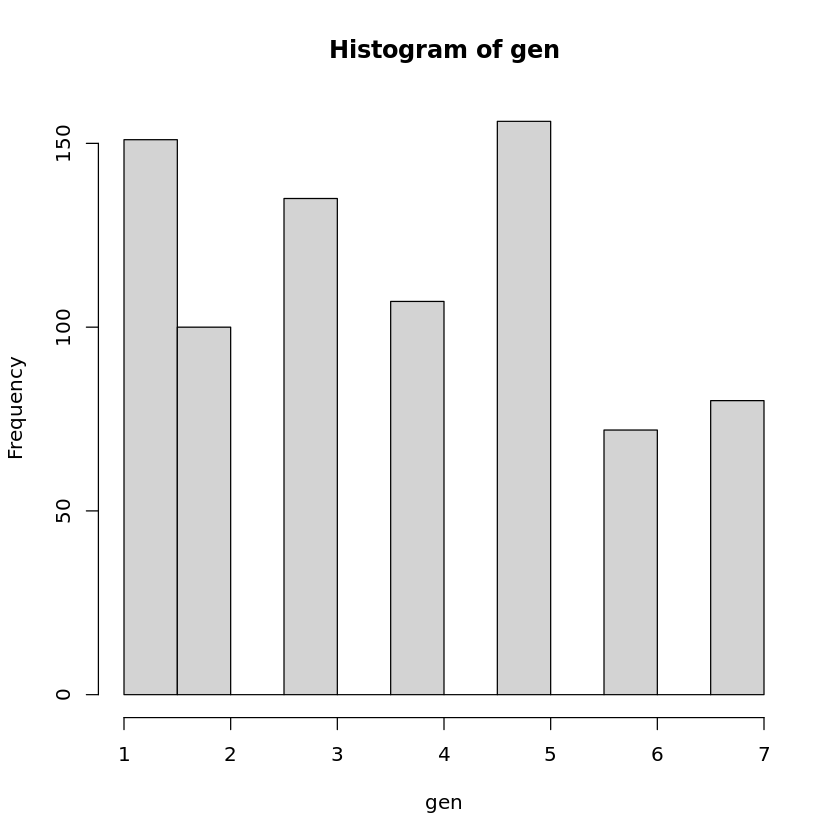

In [9]:
hist(gen)

### Procedemos a contar cuántos hay por generación

In [11]:
gen_1 <- 0
gen_2 <- 0
gen_3 <- 0
gen_4 <- 0
gen_5 <- 0
gen_6 <- 0
gen_7 <- 0

for(i in gen) {
   if (i == 1) {
        gen_1 <- gen_1 + 1}
    else if ( i == 2) {
        gen_2 <- gen_2 + 1
}
    else if ( i == 3) {
        gen_3 <- gen_3 + 1
}
    else if ( i == 4) {
        gen_4 <- gen_4 + 1
}
    else if ( i == 5) {
        gen_5 <- gen_5 + 1
}
    else if ( i == 6) {
        gen_6 <- gen_6 + 1
}
    else if ( i == 7) {
        gen_7 <- gen_7 + 1
}
}

In [13]:
cat(gen_1, gen_2, gen_3, gen_4, gen_5, gen_6, gen_7)

151 100 135 107 156 72 80

### Calculamos las frecuencias y las probabilidades asociadas a cada generación

In [23]:
total <- length(gen)
P_g1 <- gen_1/total
P_g2 <- gen_2/total
P_g3 <- gen_3/total
P_g4 <- gen_4/total
P_g5 <- gen_5/total
P_g6 <- gen_6/total
P_g7 <- gen_7/total

generaciones <- c(1,2,3,4,5,6,7)

Probs_gen <- c(P_g1, P_g2, P_g3,P_g4, P_g5, P_g6, P_g7 )
Probs_gen

[1] 0.18851436 0.12484395 0.16853933 0.13358302 0.19475655 0.08988764 0.09987516

In [24]:
sum(Probs_gen)

[1] 1

In [26]:
df_gen<- data.frame(generaciones, Probs_gen)
df_gen

generaciones,Probs_gen
<dbl>,<dbl>
1,0.18851436
2,0.12484395
3,0.16853933
4,0.13358302
5,0.19475655
6,0.08988764
7,0.09987516


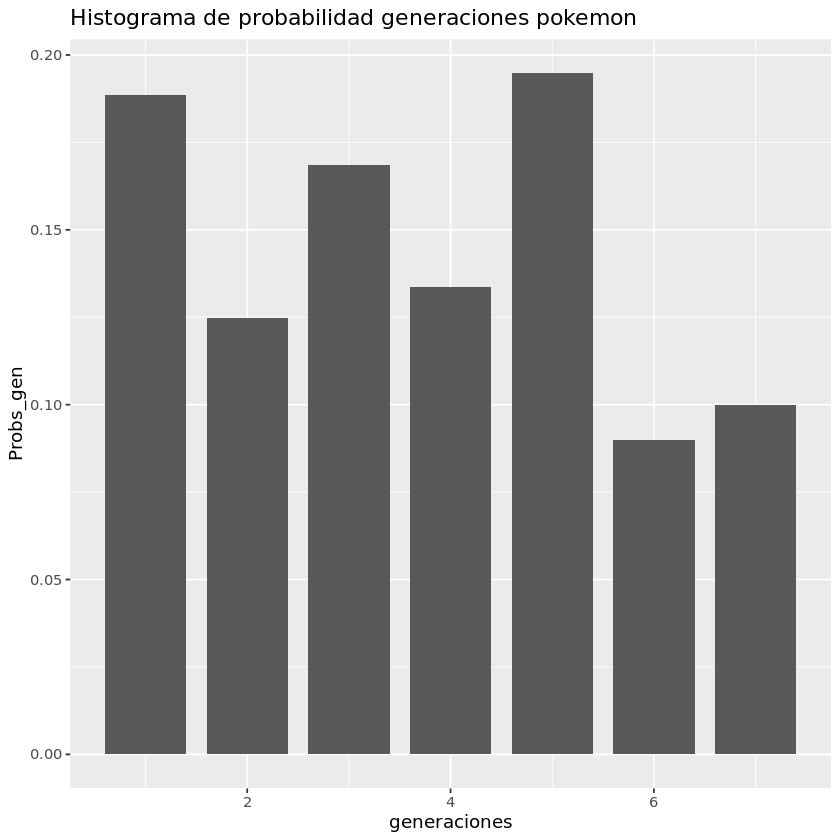

In [40]:
ggplot(data = df_gen, aes(x=generaciones, y=Probs_gen)) + geom_col(width=.8) +
ggtitle('Histograma de probabilidad generaciones pokemon')